<a href="https://colab.research.google.com/github/kabilan942/coursera-gp/blob/main/Machine_Learning_for_Kyphosis_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Kyphosis Disease Classification**

## **Importing Libraries and DataSets**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [4]:
kyphosis_df = pd.read_csv('kyphosis.csv')

In [5]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [7]:
kyphosis_df.shape

(81, 4)

In [8]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


## **Data Pre-Processing and Data Visualization**

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
kyphosis_df['Kyphosis'] = le.fit_transform(kyphosis_df['Kyphosis'])

In [18]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


In [20]:
kyphosis_df_true = kyphosis_df[kyphosis_df['Kyphosis']==1]
kyphosis_df_true.head()

,Kyphosis,Age,Number,Start
2,1,128,4,5
9,1,59,6,12
10,1,82,5,14
21,1,105,6,5
22,1,96,3,12


In [21]:
kyphosis_df_false = kyphosis_df[kyphosis_df['Kyphosis']==0]
kyphosis_df_false.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
3,0,2,5,1
4,0,1,4,15
5,0,1,2,16


In [29]:
print('Total number of cases:', kyphosis_df['Kyphosis'].count())
print('Disease present after operation:', kyphosis_df_true['Kyphosis'].count())
print('Disease absent after operation:', kyphosis_df_false['Kyphosis'].count())

print()

print('Disease present after operation (in percentage):', kyphosis_df_true['Kyphosis'].count()/kyphosis_df['Kyphosis'].count()*100,'%')
print('Disease absent after operation (in percentage):', kyphosis_df_false['Kyphosis'].count()/kyphosis_df['Kyphosis'].count()*100,'%')

Total number of cases: 81
Disease present after operation: 17
Disease absent after operation: 64

Disease present after operation (in percentage): 20.98765432098765 %
Disease absent after operation (in percentage): 79.01234567901234 %


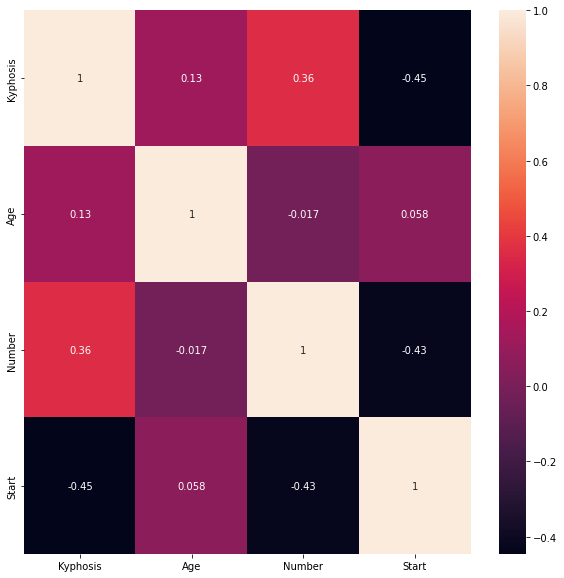

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(kyphosis_df.corr(),annot=True)

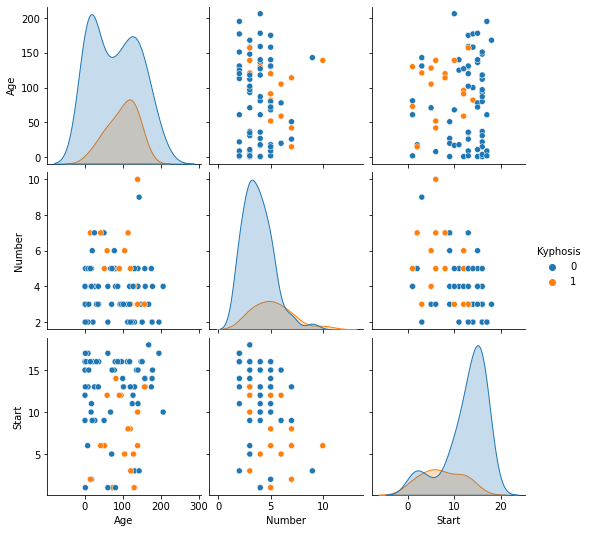

In [33]:
sns.pairplot(kyphosis_df, hue='Kyphosis')

## **Creating Testing and Training Dataset**

In [34]:
X = kyphosis_df.drop('Kyphosis', axis=1)
X.head()

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15


In [35]:
y = kyphosis_df['Kyphosis']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Kyphosis, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [38]:
X_train.shape

(60, 3)

In [40]:
X_test.shape

(21, 3)

## **Logistic Regression Classifier Model**

In [44]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)


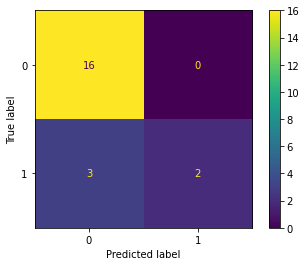

In [47]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
print(cm_lr)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        16
           1       1.00      0.40      0.57         5

    accuracy                           0.86        21
   macro avg       0.92      0.70      0.74        21
weighted avg       0.88      0.86      0.83        21



## **Decision Tree Classifier Model**

In [49]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

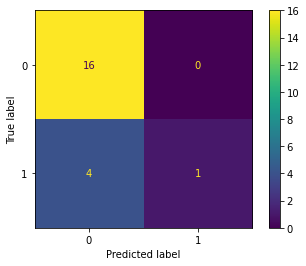

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_tree = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree)
print(cm_tree)

In [51]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        16
           1       1.00      0.20      0.33         5

    accuracy                           0.81        21
   macro avg       0.90      0.60      0.61        21
weighted avg       0.85      0.81      0.76        21



## **Random Forest CLassifier**

In [52]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)

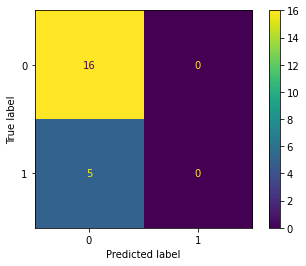

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_rf = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
print(cm_rf)

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        16
           1       0.00      0.00      0.00         5

    accuracy                           0.76        21
   macro avg       0.38      0.50      0.43        21
weighted avg       0.58      0.76      0.66        21



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
